In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_predict, TimeSeriesSplit, KFold, cross_val_score
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from sklearn.metrics import mean_squared_error
from datetime import datetime
pd.set_option('display.max_rows', None)
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [ ]:
df2=pd.read_csv(r"C:\Users\k.mpotsi\Documents\fuel_avg_prices_temp.csv")
df2

In [ ]:
colours = ['g', 'r'] 
plt.figure(figsize=(10,7))
sns.heatmap(df2.isna(),cmap=sns.color_palette(colours),
            cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values Heatmap');
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [3]:
df=pd.read_csv(r"C:\Users\k.mpotsi\Desktop\ΕΡΓΑΣΙΑ_ΠΡΑΚΤΊΚΗ\datacsv\fuels_avg_prices_interpolated.csv")
df

,date,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης,online
0,2017-03-14,1.292,0.984,1.6460,1.727,1.5330,0.8590,published
1,2017-03-15,1.290,0.981,1.6460,1.726,1.5300,0.8580,published
2,2017-03-16,1.288,0.979,1.6470,1.723,1.5270,0.8570,published
3,2017-03-17,1.286,0.977,1.6500,1.716,1.5250,0.8570,published
4,2017-03-18,1.285,0.976,1.6505,1.716,1.5235,0.8565,NaN
...,...,...,...,...,...,...,...,...
1916,2022-06-11,2.025,1.623,2.0360,2.553,2.4040,1.1150,published
1917,2022-06-12,2.029,1.623,2.0360,2.558,2.4050,1.1150,published
1918,2022-06-13,2.035,1.623,2.0210,2.564,2.4080,1.1140,published
1919,2022-06-14,2.049,1.623,2.0210,2.573,2.4160,1.1130,published


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1921 non-null   object 
 1   Diesel Kίνησης    1921 non-null   float64
 2   Diesel Θέρμανσης  1921 non-null   float64
 3   Super             1921 non-null   float64
 4   Αμόλυβδη 100      1921 non-null   float64
 5   Αμόλυβδη 95       1921 non-null   float64
 6   Υγραέριο κίνησης  1921 non-null   float64
 7   online            1875 non-null   object 
dtypes: float64(6), object(2)
memory usage: 120.2+ KB


In [18]:
df2["Diesel Θέρμανσης"]=df2["Diesel Θέρμανσης"].dropna()

In [5]:
df["date"]=pd.to_datetime(df["date"])
df['year'] = pd.DatetimeIndex(df["date"]).year
df['month'] = pd.DatetimeIndex(df["date"]).month
df['day'] = pd.DatetimeIndex(df["date"]).day
df['weekday'] = pd.DatetimeIndex(df["date"]).weekday
df.head(10)

,date,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης,online,year,month,day,weekday
0,2017-03-14,1.292,0.984,1.6460,1.727,1.5330,0.8590,published,2017,3,14,1
1,2017-03-15,1.290,0.981,1.6460,1.726,1.5300,0.8580,published,2017,3,15,2
2,2017-03-16,1.288,0.979,1.6470,1.723,1.5270,0.8570,published,2017,3,16,3
3,2017-03-17,1.286,0.977,1.6500,1.716,1.5250,0.8570,published,2017,3,17,4
4,2017-03-18,1.285,0.976,1.6505,1.716,1.5235,0.8565,NaN,2017,3,18,5
5,2017-03-19,1.284,0.975,1.6510,1.716,1.5220,0.8560,published,2017,3,19,6
6,2017-03-20,1.283,0.972,1.6510,1.721,1.5200,0.8550,published,2017,3,20,0
7,2017-03-21,1.281,0.972,1.6540,1.720,1.5190,0.8530,published,2017,3,21,1
8,2017-03-22,1.280,0.970,1.6540,1.719,1.5180,0.8530,published,2017,3,22,2
9,2017-03-23,1.279,0.970,1.6430,1.718,1.5170,0.8520,published,2017,3,23,3


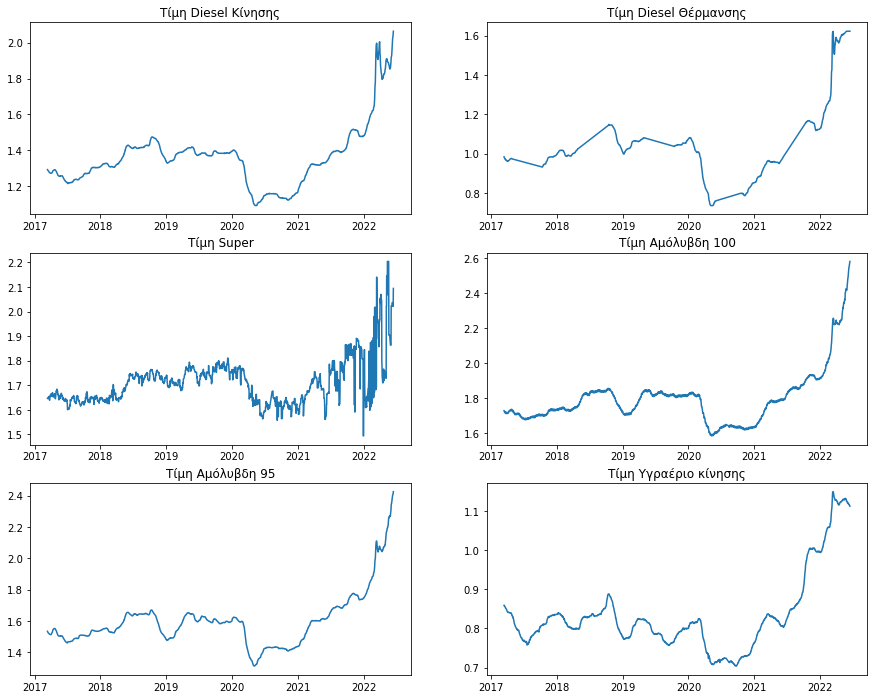

In [5]:
fig, axs = plt.subplots(3, 2,figsize=(15, 12))
axs[0, 0].plot(df["date"],df["Diesel Kίνησης"])
axs[0, 0].set_title('Τίμη Diesel Κίνησης')
axs[0, 1].plot(df["date"],df["Diesel Θέρμανσης"])
axs[0, 1].set_title('Τίμη Diesel Θέρμανσης')
axs[1, 0].plot(df["date"],df["Super"])
axs[1, 0].set_title('Τίμη Super')
axs[1, 1].plot(df["date"],df["Αμόλυβδη 100"])
axs[1, 1].set_title('Τίμη Αμόλυβδη 100')
axs[2,0].plot(df["date"],df["Αμόλυβδη 95"]);
axs[2,0].set_title('Τίμη Αμόλυβδη 95')
axs[2,1].plot(df["date"],df["Υγραέριο κίνησης"]);
axs[2,1].set_title('Τίμη Υγραέριο κίνησης');

In [6]:
df.groupby("year")[['Diesel Kίνησης','Diesel Θέρμανσης','Super','Αμόλυβδη 100','Αμόλυβδη 95','Υγραέριο κίνησης']].skew()
round(df.groupby("year")[['Diesel Kίνησης']].skew(),2)

,Diesel Kίνησης
year,
2017,-0.04
2018,-0.16
2019,-0.71
2020,1.33
2021,-0.03
2022,-0.33


In [7]:
#'Υγραέριο κίνησης'
round(df.groupby("year")[['Αμόλυβδη 95']].describe(),2)
round(df.groupby("year")[['Υγραέριο κίνησης']].describe(),2)

Υγραέριο κίνησης                                          
                count  mean   std   min   25%   50%   75%   max
year                                                           
2017            293.0  0.81  0.03  0.76  0.78  0.81  0.83  0.86
2018            365.0  0.83  0.02  0.78  0.80  0.83  0.84  0.89
2019            365.0  0.79  0.02  0.76  0.78  0.79  0.81  0.82
2020            366.0  0.74  0.04  0.70  0.72  0.73  0.76  0.82
2021            366.0  0.87  0.07  0.76  0.82  0.84  0.90  1.00
2022            166.0  1.09  0.05  0.99  1.06  1.12  1.13  1.15

In [8]:
round(df.groupby("year")[['Super']].describe(),2)
#,'Αμόλυβδη 100'
round(df.groupby("year")[['Αμόλυβδη 100']].describe(),2)


Αμόλυβδη 100                                          
            count  mean   std   min   25%   50%   75%   max
year                                                       
2017        293.0  1.71  0.02  1.68  1.70  1.70  1.72  1.74
2018        365.0  1.79  0.05  1.72  1.74  1.80  1.84  1.85
2019        365.0  1.80  0.04  1.70  1.79  1.82  1.82  1.85
2020        366.0  1.67  0.08  1.58  1.63  1.64  1.68  1.83
2021        366.0  1.82  0.08  1.63  1.78  1.82  1.88  1.93
2022        166.0  2.18  0.19  1.91  2.01  2.22  2.30  2.58

In [9]:
#'Diesel Θέρμανσης'
round(df.groupby("year")[['Diesel Kίνησης']].describe(),2)
round(df.groupby("year")[['Diesel Θέρμανσης']].describe(),2)

Diesel Θέρμανσης                                          
                count  mean   std   min   25%   50%   75%   max
year                                                           
2017            293.0  0.96  0.02  0.93  0.95  0.96  0.97  1.00
2018            365.0  1.06  0.05  0.99  1.02  1.05  1.11  1.15
2019            365.0  1.05  0.02  1.00  1.04  1.05  1.07  1.08
2020            366.0  0.84  0.10  0.74  0.77  0.80  0.85  1.08
2021            366.0  1.03  0.10  0.85  0.96  1.01  1.12  1.17
2022            166.0  1.45  0.18  1.13  1.25  1.57  1.61  1.62

In [10]:
df.head()

,date,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης,online,year,month,day,weekday
0,2017-03-14,1.292,0.984,1.6460,1.727,1.5330,0.8590,published,2017,3,14,1
1,2017-03-15,1.290,0.981,1.6460,1.726,1.5300,0.8580,published,2017,3,15,2
2,2017-03-16,1.288,0.979,1.6470,1.723,1.5270,0.8570,published,2017,3,16,3
3,2017-03-17,1.286,0.977,1.6500,1.716,1.5250,0.8570,published,2017,3,17,4
4,2017-03-18,1.285,0.976,1.6505,1.716,1.5235,0.8565,NaN,2017,3,18,5


In [11]:
df[['Diesel Kίνησης','Diesel Θέρμανσης','Super','Αμόλυβδη 100','Αμόλυβδη 95','Υγραέριο κίνησης']].skew()

Diesel Kίνησης      1.545260
Diesel Θέρμανσης    1.450591
Super               1.725059
Αμόλυβδη 100        2.172653
Αμόλυβδη 95         1.933237
Υγραέριο κίνησης    1.660397
dtype: float64

In [12]:
df[['Diesel Kίνησης','Diesel Θέρμανσης','Super','Αμόλυβδη 100','Αμόλυβδη 95','Υγραέριο κίνησης']].kurtosis()-3

Diesel Kίνησης      0.697157
Diesel Θέρμανσης    0.571980
Super               2.168905
Αμόλυβδη 100        3.385771
Αμόλυβδη 95         2.295864
Υγραέριο κίνησης   -0.608066
dtype: float64

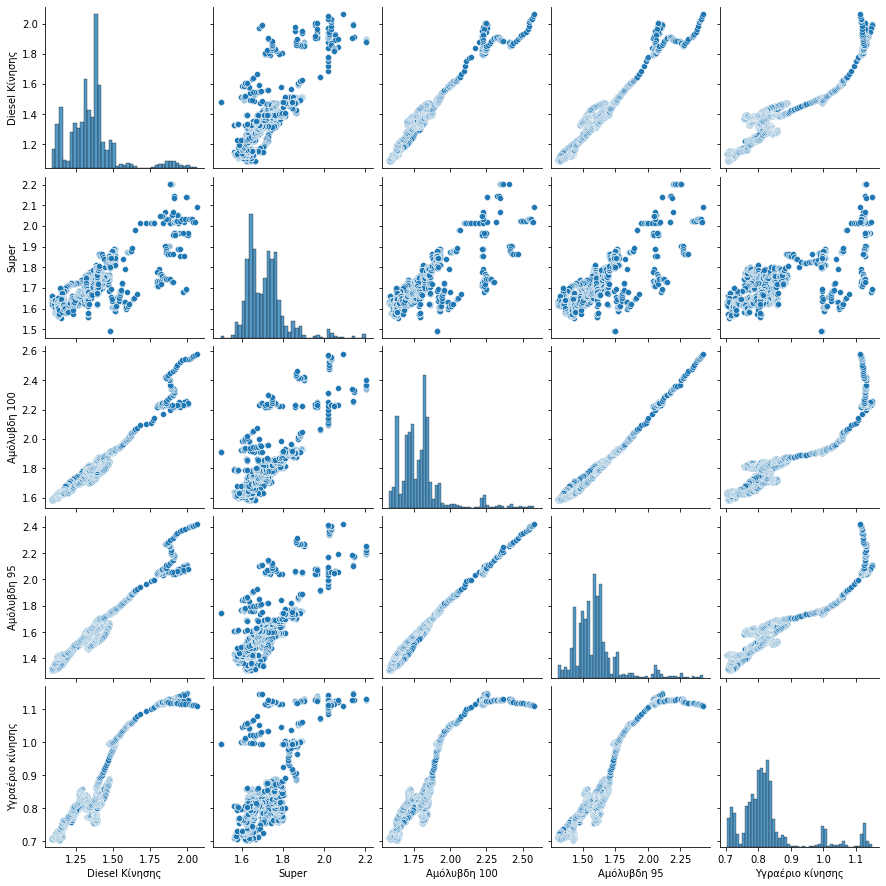

In [13]:
sns.pairplot(df[["Diesel Kίνησης",'Super',"Αμόλυβδη 100","Αμόλυβδη 95","Υγραέριο κίνησης"]],kind='scatter');

In [2]:
#HO YPARXEI STASIMOTHTA 
#H1 DEN YPARXEI STATIMOTHTA 
adfuller(np.log(df["Diesel Kίνησης"]))[0]

NameError: name 'adfuller' is not defined

In [15]:
adf_Diesel_κίνησης=adfuller((df["Diesel Kίνησης"]))

In [1]:
adf_Diesel_κίνησης[1]

NameError: name 'adf_Diesel_κίνησης' is not defined

In [17]:
adf_Super=adfuller((df["Super"]))

In [18]:
adf_Super[1]

0.3359860146541752

In [19]:
adf_Αμόλυβδη_100=adfuller((df["Αμόλυβδη 100"]))

In [20]:
adf_Αμόλυβδη_100

(3.0669506044979236,
 1.0,
 24,
 1896,
 {'1%': -3.4338036790464495,
  '5%': -2.8630656035129878,
  '10%': -2.5675821738080615},
 -17509.271544675437)

In [21]:
adf_Αμόλυβδη_95=adfuller((df["Αμόλυβδη 95"]))
adf_Αμόλυβδη_95

(2.0276046113647412,
 0.9987077642935747,
 24,
 1896,
 {'1%': -3.4338036790464495,
  '5%': -2.8630656035129878,
  '10%': -2.5675821738080615},
 -18532.682227142872)

In [22]:
adf_Υγραέριο_κίνησης=adfuller((df["Υγραέριο κίνησης"]))
adf_Υγραέριο_κίνησης[1]

0.9013122180249056

In [23]:
adf_Diesel_κίνησης_LOGDIFF=adfuller(np.diff(np.log(df["Diesel Kίνησης"])))

In [24]:
adf_Super_LOGDIFF=adfuller(np.diff(np.log((df["Super"]))))

In [25]:
adf_Αμόλυβδη_100_LOGDIFF=adfuller(np.diff(np.log(df["Αμόλυβδη 100"])))

In [26]:
adf_Αμόλυβδη_95_LOGDIFF=adfuller(np.diff(np.log(df["Αμόλυβδη 95"])))

In [27]:
adf_Υγραέριο_κίνησης_LOGDIFF=adfuller(np.diff(np.log(df["Υγραέριο κίνησης"])))

In [28]:
#dDickey-Fuller test πριν τον μετασχηματίσμο 
#δεν απορρίπτουμε την Η0 συνέπως δεν εχουμε στασίμοτητα 
pd.DataFrame([adf_Diesel_κίνησης[1],adf_Super[1],adf_Αμόλυβδη_100[1],adf_Αμόλυβδη_95[1],adf_Υγραέριο_κίνησης[1]], index=['adf_Diesel_κίνησης', 'adf_Super', 'adf_Αμόλυβδη_100','adf_Αμόλυβδη_95','adf_Υγραέριο_κίνησης'], columns=['p-value'])

,p-value
adf_Diesel_κίνησης,0.997891
adf_Super,0.335986
adf_Αμόλυβδη_100,1.000000
adf_Αμόλυβδη_95,0.998708
adf_Υγραέριο_κίνησης,0.901312


In [29]:
dftest = adfuller(df['Αμόλυβδη 95'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Test Statistic                    2.027605
p-value                           0.998708
#lags used                       24.000000
number of observations used    1896.000000
critical value (1%)              -3.433804
critical value (5%)              -2.863066
critical value (10%)             -2.567582
dtype: float64


In [30]:
df.head()

,date,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης,online,year,month,day,weekday
0,2017-03-14,1.292,0.984,1.6460,1.727,1.5330,0.8590,published,2017,3,14,1
1,2017-03-15,1.290,0.981,1.6460,1.726,1.5300,0.8580,published,2017,3,15,2
2,2017-03-16,1.288,0.979,1.6470,1.723,1.5270,0.8570,published,2017,3,16,3
3,2017-03-17,1.286,0.977,1.6500,1.716,1.5250,0.8570,published,2017,3,17,4
4,2017-03-18,1.285,0.976,1.6505,1.716,1.5235,0.8565,NaN,2017,3,18,5


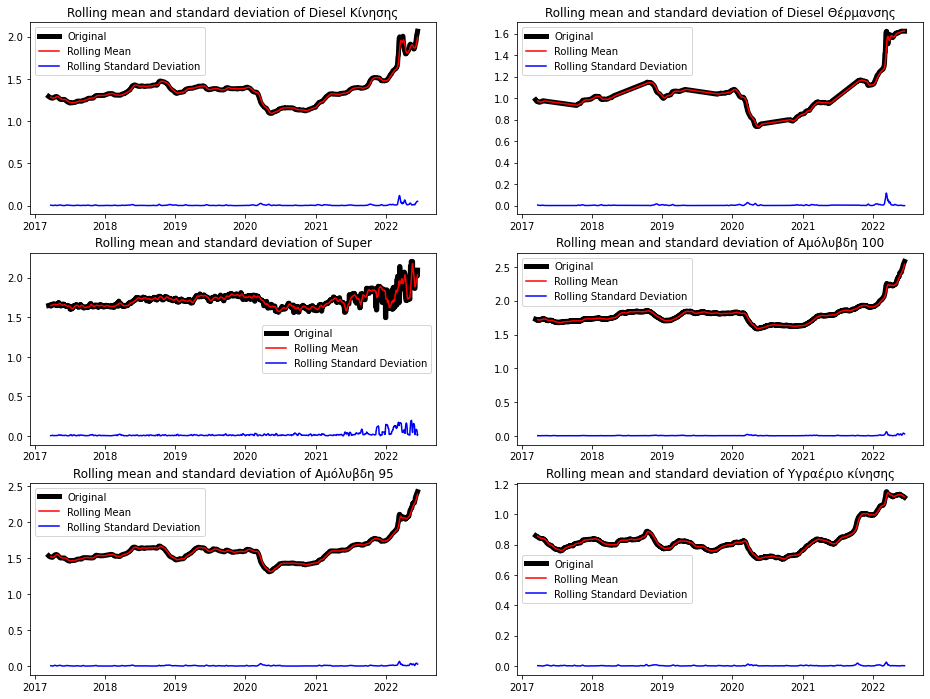

In [31]:
fig, axs1 = plt.subplots(3,2,figsize=(16, 12))
axs1[0,0].plot(df["date"],df["Diesel Kίνησης"],color='black',label='Original',lw=5)
axs1[0,0].plot(df["date"],df["Diesel Kίνησης"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[0,0].plot(df["date"],df["Diesel Kίνησης"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[0,0].legend(loc='best')
axs1[0,0].set_title("Rolling mean and standard deviation of Diesel Kίνησης")

axs1[0,1].plot(df["date"],df["Diesel Θέρμανσης"],color='black',label='Original',lw=5)
axs1[0,1].plot(df["date"],df["Diesel Θέρμανσης"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[0,1].plot(df["date"],df["Diesel Θέρμανσης"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[0,1].legend(loc='best')
axs1[0,1].set_title("Rolling mean and standard deviation of Diesel Θέρμανσης")


axs1[1,0].plot(df["date"],df["Super"],color='black',label='Original',lw=5)
axs1[1,0].plot(df["date"],df["Super"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[1,0].plot(df["date"],df["Super"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[1,0].legend(loc='best')
axs1[1,0].set_title("Rolling mean and standard deviation of Super")


axs1[1,1].plot(df["date"],df["Αμόλυβδη 100"],color='black',label='Original',lw=5)
axs1[1,1].plot(df["date"],df["Αμόλυβδη 100"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[1,1].plot(df["date"],df["Αμόλυβδη 100"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[1,1].legend(loc='best')
axs1[1,1].set_title("Rolling mean and standard deviation of Αμόλυβδη 100")

axs1[2,0].plot(df["date"],df["Αμόλυβδη 95"],color='black',label='Original',lw=5)
axs1[2,0].plot(df["date"],df["Αμόλυβδη 95"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[2,0].plot(df["date"],df["Αμόλυβδη 95"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[2,0].legend(loc='best')
axs1[2,0].set_title("Rolling mean and standard deviation of Αμόλυβδη 95")


axs1[2,1].plot(df["date"],df["Υγραέριο κίνησης"],color='black',label='Original',lw=5)
axs1[2,1].plot(df["date"],df["Υγραέριο κίνησης"].rolling(window=12).mean(),color='red',label='Rolling Mean')
axs1[2,1].plot(df["date"],df["Υγραέριο κίνησης"].rolling(window=12).std(),color='blue',label = 'Rolling Standard Deviation')
axs1[2,1].legend(loc='best')
axs1[2,1].set_title("Rolling mean and standard deviation of Υγραέριο κίνησης")
plt.show(block=False)

C:\Users\k.mpotsi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\k.mpotsi\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


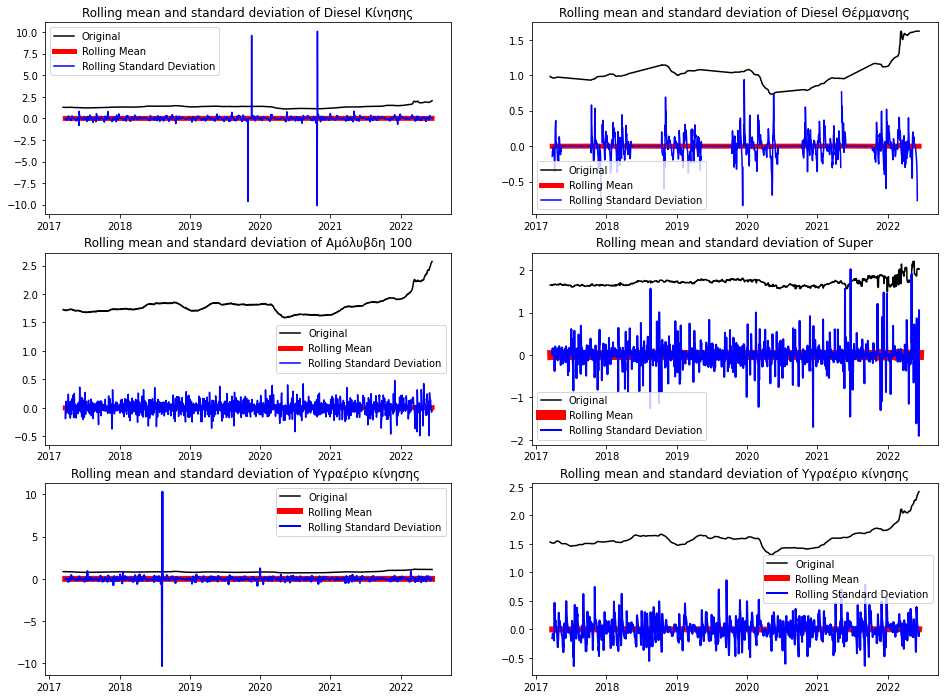

In [32]:
fig, axs1 = plt.subplots(3,2,figsize=(16, 12))
axs1[0,0].plot(df["date"][0:1920],df["Diesel Kίνησης"][0:1920],color='black',label='Original')
axs1[0,0].plot(df["date"][0:1920],np.diff(np.log(df["Diesel Kίνησης"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=5, ms=8, mew=2, mec='navy')
axs1[0,0].plot(df["date"][0:1920],np.diff(np.log(df["Diesel Kίνησης"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation')
axs1[0,0].legend(loc='best')
axs1[0,0].set_title("Rolling mean and standard deviation of Diesel Kίνησης")


axs1[0,1].plot(df["date"][0:1920],df["Diesel Θέρμανσης"][0:1920],color='black',label='Original')
axs1[0,1].plot(df["date"][0:1920],np.diff(np.log(df["Diesel Θέρμανσης"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=5, ms=8, mew=2, mec='navy')
axs1[0,1].plot(df["date"][0:1920],np.diff(np.log(df["Diesel Θέρμανσης"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation')
axs1[0,1].legend(loc='best')
axs1[0,1].set_title("Rolling mean and standard deviation of Diesel Θέρμανσης")



axs1[1,0].plot(df["date"][0:1920],df["Αμόλυβδη 100"][0:1920],color='black',label='Original')
axs1[1,0].plot(df["date"][0:1920],np.diff(np.log(df["Αμόλυβδη 100"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=5, ms=8, mew=2, mec='navy')
axs1[1,0].plot(df["date"][0:1920],np.diff(np.log(df["Αμόλυβδη 100"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation')
axs1[1,0].legend(loc='best')
axs1[2,0].set_title("Rolling mean and standard deviation of Υγραέριο κίνησης ")
axs1[1,0].set_title("Rolling mean and standard deviation of Αμόλυβδη 100")


axs1[1,1].plot(df["date"][0:1920],df["Super"][0:1920],color='black',label='Original')
axs1[1,1].plot(df["date"][0:1920],np.diff(np.log(df["Super"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=10, ms=8, mew=2, mec='navy')
axs1[1,1].plot(df["date"][0:1920],np.diff(np.log(df["Super"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation',lw=2)
axs1[1,1].legend(loc='best')
axs1[1,1].set_title("Rolling mean and standard deviation of Super")


axs1[2,0].plot(df["date"][0:1920],df["Υγραέριο κίνησης"][0:1920],color='black',label='Original')
axs1[2,0].plot(df["date"][0:1920],np.diff(np.log(df["Υγραέριο κίνησης"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=6, ms=8, mew=2, mec='navy')
axs1[2,0].plot(df["date"][0:1920],np.diff(np.log(df["Υγραέριο κίνησης"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation',lw=2)
axs1[2,0].legend(loc='best')
axs1[2,0].set_title("Rolling mean and standard deviation of Υγραέριο κίνησης ")


axs1[2,1].plot(df["date"][0:1920],df["Αμόλυβδη 95"][0:1920],color='black',label='Original')
axs1[2,1].plot(df["date"][0:1920],np.diff(np.log(df["Αμόλυβδη 95"].rolling(window=12).mean())),color='red',label='Rolling Mean',ls='-', lw=6, ms=8, mew=2, mec='navy')
axs1[2,1].plot(df["date"][0:1920],np.diff(np.log(df["Αμόλυβδη 95"].rolling(window=12).std())),color='blue',label = 'Rolling Standard Deviation',lw=2)
axs1[2,1].legend(loc='best')
axs1[2,1].set_title("Rolling mean and standard deviation of Υγραέριο κίνησης")
plt.show(block=False)


In [33]:
df

,date,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης,online,year,month,day,weekday
0,2017-03-14,1.292,0.984,1.6460,1.727,1.5330,0.8590,published,2017,3,14,1
1,2017-03-15,1.290,0.981,1.6460,1.726,1.5300,0.8580,published,2017,3,15,2
2,2017-03-16,1.288,0.979,1.6470,1.723,1.5270,0.8570,published,2017,3,16,3
3,2017-03-17,1.286,0.977,1.6500,1.716,1.5250,0.8570,published,2017,3,17,4
4,2017-03-18,1.285,0.976,1.6505,1.716,1.5235,0.8565,NaN,2017,3,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1916,2022-06-11,2.025,1.623,2.0360,2.553,2.4040,1.1150,published,2022,6,11,5
1917,2022-06-12,2.029,1.623,2.0360,2.558,2.4050,1.1150,published,2022,6,12,6
1918,2022-06-13,2.035,1.623,2.0210,2.564,2.4080,1.1140,published,2022,6,13,0
1919,2022-06-14,2.049,1.623,2.0210,2.573,2.4160,1.1130,published,2022,6,14,1


In [34]:
#Ho stasimothta 
#H1 mh-stasimo 
#p-value<0.05 aporriptoume H0 ara twra einai stasimh h seira gia na mporesoume na sunexisoume thn analush 
pd.DataFrame([adf_Diesel_κίνησης_LOGDIFF[1],adf_Super_LOGDIFF[1],adf_Αμόλυβδη_100_LOGDIFF[1],adf_Αμόλυβδη_95_LOGDIFF[1],adf_Υγραέριο_κίνησης_LOGDIFF[1]], index=['diff(log(adf_Diesel_κίνησης))', 'diff(log(adf_Super))', 'diff(log(adf_Αμόλυβδη_100))','diff(log(adf_Αμόλυβδη_95))','diff(log(adf_Υγραέριο_κίνησης))'], columns=['p-value'])

,p-value
diff(log(adf_Diesel_κίνησης)),4.677299e-09
diff(log(adf_Super)),2.005182e-20
diff(log(adf_Αμόλυβδη_100)),2.350028e-05
diff(log(adf_Αμόλυβδη_95)),2.562097e-05
diff(log(adf_Υγραέριο_κίνησης)),2.991424e-10


In [142]:
adf_Diesel_κίνησης_LOGDIFF[1]

4.677298690064242e-09

In [132]:
from scipy import stats
#ΑΠΟΤΤΙΠΤΕΤΑΙ Η ΥΠΟΘΕΣΗ ΤΗς ΚΑΝΟΝΗΤΟΤΗΤΑΣ 

In [56]:
print(stats.jarque_bera(np.diff(np.log(df["Diesel Kίνησης"]))))
print(stats.jarque_bera(np.diff(np.log(df["Diesel Θέρμανσης"]))))
print(stats.jarque_bera(np.diff(np.log(df["Super"]))))
print(stats.jarque_bera(np.diff(np.log(df["Αμόλυβδη 100"]))))
print(stats.jarque_bera(np.diff(np.log(df["Αμόλυβδη 95"]))))

Jarque_beraResult(statistic=196575.97649467996, pvalue=0.0)
Jarque_beraResult(statistic=698056.7442444135, pvalue=0.0)
Jarque_beraResult(statistic=246031.24359056941, pvalue=0.0)
Jarque_beraResult(statistic=746.3690287092458, pvalue=0.0)
Jarque_beraResult(statistic=19960.80865876706, pvalue=0.0)


In [147]:
print(stats.jarque_bera(np.diff(np.log(df["Diesel Θέρμανσης"]))))

Jarque_beraResult(statistic=698056.7442444135, pvalue=0.0)

In [152]:
print(stats.jarque_bera(np.diff(np.log(df["Super"]))))

Jarque_beraResult(statistic=246031.24359056941, pvalue=0.0)

In [153]:
print(stats.jarque_bera(np.diff(np.log(df["Αμόλυβδη 100"]))))

Jarque_beraResult(statistic=746.3690287092458, pvalue=0.0)

In [154]:
print(stats.jarque_bera(np.diff(np.log(df["Αμόλυβδη 95"]))))

Jarque_beraResult(statistic=19960.80865876706, pvalue=0.0)

In [173]:
df2=df.iloc[:,1:7]

In [174]:
df2

,Diesel Kίνησης,Diesel Θέρμανσης,Super,Αμόλυβδη 100,Αμόλυβδη 95,Υγραέριο κίνησης
0,1.292,0.984,1.6460,1.727,1.5330,0.8590
1,1.290,0.981,1.6460,1.726,1.5300,0.8580
2,1.288,0.979,1.6470,1.723,1.5270,0.8570
3,1.286,0.977,1.6500,1.716,1.5250,0.8570
4,1.285,0.976,1.6505,1.716,1.5235,0.8565
...,...,...,...,...,...,...
1916,2.025,1.623,2.0360,2.553,2.4040,1.1150
1917,2.029,1.623,2.0360,2.558,2.4050,1.1150
1918,2.035,1.623,2.0210,2.564,2.4080,1.1140
1919,2.049,1.623,2.0210,2.573,2.4160,1.1130


In [145]:
adf_Diesel_κίνησης_LOGDIFF

(-6.667502996353531,
 4.677298690064242e-09,
 26,
 1893,
 {'1%': -3.433809159837753,
  '5%': -2.8630680231563534,
  '10%': -2.567583462170105},
 -19596.988483656856)

In [192]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

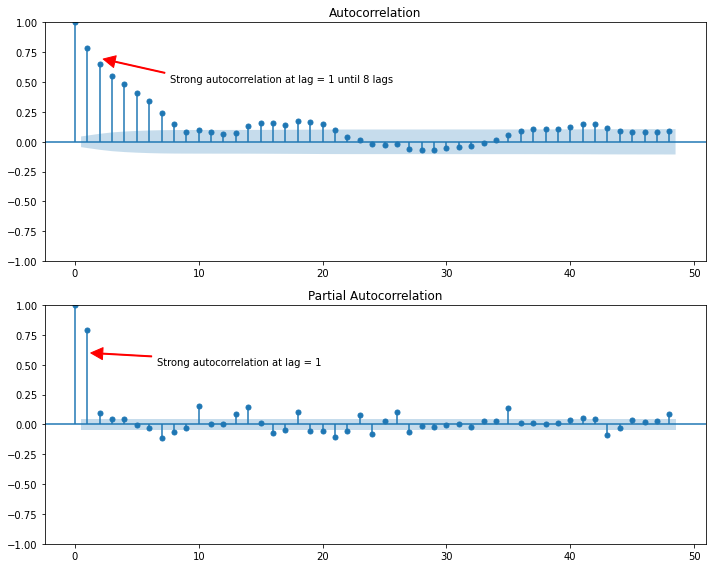

In [58]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plot_acf(np.diff(np.log(df["Diesel Kίνησης"])),lags=48,ax=ax[0])
plot_pacf(np.diff(np.log(df["Diesel Kίνησης"])),lags=48, ax=ax[1], method='ols')

ax[0].annotate('Strong autocorrelation at lag = 1 until 8 lags', xy=(2, 0.7),  xycoords='data',
            xytext=(0.19, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('Strong autocorrelation at lag = 1', xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [189]:
from statsmodels.tsa.arima.model import ARIMA

In [190]:
#-19685.079
modelARMA=ARIMA(np.diff(np.log(df["Diesel Kίνησης"])), order=(1, 0,7))
results = modelARMA.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1920
Model:                 ARIMA(1, 0, 7)   Log Likelihood                9875.815
Date:                Thu, 08 Sep 2022   AIC                         -19731.629
Time:                        12:59:12   BIC                         -19676.029
Sample:                             0   HQIC                        -19711.172
                               - 1920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.229      0.219      -0.000       0.001
ar.L1          0.6592      0.017     39.185      0.000       0.626       0.692
ma.L1          0.0258      0.015      1.710      0.0

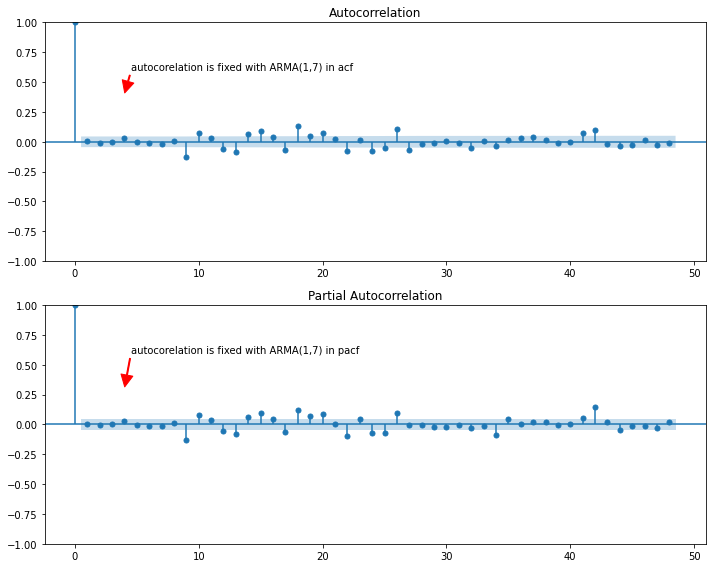

In [193]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plot_acf(results.resid,lags=48,ax=ax[0])
plot_pacf(results.resid,lags=48,ax=ax[1],method='ols')

ax[0].annotate('autocorelation is fixed with ARMA(1,7) in acf ', xy=(4, 0.4),  xycoords='data',
            xytext=(0.13, 0.80), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

ax[1].annotate('autocorelation is fixed with ARMA(1,7) in pacf ', xy=(4, 0.3),  xycoords='data',
            xytext=(0.13, 0.80), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [ ]:
train=df[:960]
test=df[960:]

In [ ]:
model = ARIMA(np.diff(np.log(train['Diesel Kίνησης'])), order=(1, 0, 5))  
fitted = model.fit()  

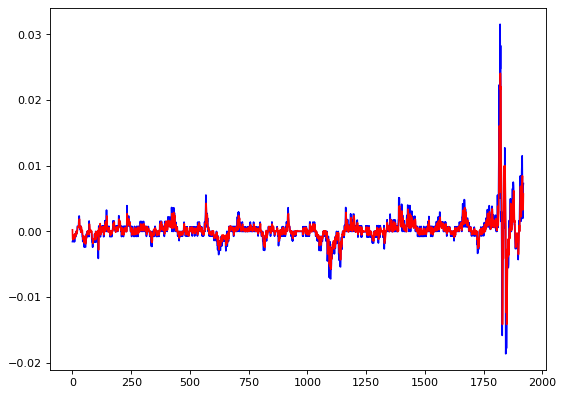

In [198]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(fitted.predict(),color="red",label="training")
plt.plot(np.diff(np.log(test["Diesel Kίνησης"])),color="blue",label="actual")
plt.legend(["train_set_model","actual"])

In [199]:
stats.probplot(fitted.resid, dist="norm", plot=plt)#ικανοποιείται η υποθέση της κανόνικοτητας 
import scipy.stats as stats
stats.shapiro(fitted.resid)#kanonika 

array([0.00587524, 0.00404736, 0.00218057, 0.00157113, 0.00196232,
       0.00204065, 0.00159027, 0.00113148, 0.00082905, 0.00062967,
       0.00049825, 0.00041161, 0.00035449, 0.00031684, 0.00029203,
       0.00027566, 0.00026488, 0.00025777, 0.00025308, 0.00024999,
       0.00024796, 0.00024661, 0.00024573, 0.00024514, 0.00024476,
       0.00024451, 0.00024434, 0.00024423, 0.00024416, 0.00024411,
       0.00024408, 0.00024406, 0.00024404, 0.00024403, 0.00024403,
       0.00024402, 0.00024402, 0.00024402, 0.00024402, 0.00024402,
       0.00024402, 0.00024402, 0.00024402, 0.00024402, 0.00024402,
       0.00024402, 0.00024402, 0.00024402, 0.00024402, 0.00024402,
       0.00024402, 0.00024402, 0.00024402, 0.00024402, 0.00024402,
       0.00024402, 0.00024402, 0.00024402, 0.00024402, 0.00024402,
       0.00024402])

In [ ]:
times = pd.date_range('2017-04-01', periods=31, freq='3M')
times[0:21]

In [ ]:
pd.DataFrame(times)

In [ ]:
df1=pd.read_csv(r"C:\Users\k.mpotsi\Desktop\ΕΡΓΑΣΙΑ_ΠΡΑΚΤΊΚΗ\datacsv\fuels_avg_prices_interpolated.csv")
df1.head()

In [ ]:
df1.set_index('date', inplace=True)
df1.index = pd.to_datetime(df1.index)
df1=df1.resample('3M').mean()

In [ ]:
df2=pd.read_csv(r"C:\Users\k.mpotsi\Desktop\ΕΡΓΑΣΙΑ_ΠΡΑΚΤΊΚΗ\datacsv\gdp_greece_Gia_kathe_trhmino.csv")
df2["date"]=times[0:21]
df2

In [ ]:
df2=df2.drop(df2.columns[0],axis=1)
df2=df2.drop(df2.columns[0],axis=1)

In [ ]:
df2=df2.drop(df2.columns[0],axis=1)

In [ ]:
df2=df2.rename(columns={"col3":"gdp"})

In [ ]:
df2.set_index('date', inplace=True)

In [ ]:
df3=pd.read_csv(r"C:\Users\k.mpotsi\Desktop\ΕΡΓΑΣΙΑ_ΠΡΑΚΤΊΚΗ\datacsv\interest_rate2017-2022.csv",sep=";",header=0)
df3.columns=("date","interest_rate")

In [ ]:
df3.set_index('date', inplace=True)
df3.index = pd.to_datetime(df3.index)
df3=df3.resample('3M').mean()

In [ ]:
df4=pd.read_csv(r"C:\Users\k.mpotsi\Desktop\ΕΡΓΑΣΙΑ_ΠΡΑΚΤΊΚΗ\datacsv\final_δείκτης_τίμων_κατανάλωτη - Φύλλο1.csv",header=None)
df4.columns=("Consumer_price_index","date")

In [ ]:
df4["Consumer_price_index"]=df4["Consumer_price_index"].str.replace(r"[,]",".",regex=True)

In [ ]:
df4['Consumer_price_index']=pd.to_numeric(df4['Consumer_price_index'])

In [ ]:
df4.set_index('date', inplace=True)
df4.index = pd.to_datetime(df4.index)
df4=df4.resample('3M').mean()

In [ ]:
data1=pd.merge(df4,df3,left_index=True,right_index=True)
data1

In [ ]:
data2=pd.merge(data1,df2,left_index=True,right_index=True)

In [ ]:
df1["date2"]=times[0:22]

In [ ]:
df1.set_index('date2', inplace=True)

In [ ]:
df=pd.merge(data2,df1,left_index=True,right_index=True)

In [ ]:
df[["Consumer_price_index","interest_rate","Diesel Kίνησης","gdp"]].describe()

In [ ]:
plt.figure(figsize=(7,7))
sns.pairplot(np.log(df[["Consumer_price_index","interest_rate","Diesel Kίνησης","gdp"]]),diag_kind = 'kde')

In [ ]:
sns.pairplot(np.log(df[["Consumer_price_index","interest_rate","Diesel Kίνησης","gdp"]]))

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[["Consumer_price_index","interest_rate","gdp",'Αμόλυβδη_100']].corr(),annot=True)

In [ ]:
df.rename(columns={"Diesel Kίνησης":'Diesel_κίνησης'})

In [ ]:
df.corr()

In [ ]:
df=df.rename(columns={'Αμόλυβδη 100':'Αμόλυβδη_100'})

In [ ]:
model = ols("Αμόλυβδη_100~Consumer_price_index+interest_rate+gdp", data=df)
results = model.fit()

In [ ]:
results.summary()

In [ ]:
#Null Hypothesis: The residuals are normally distributed.
#Alternative Hypothesis: The residuals are not normally distributed.
from scipy import stats
stats.shapiro(results.resid)#p-value>5% δεν απορριπτουμε την υποθέση της κανόνικοτητας

In [ ]:
from statsmodels.stats import diagnostic as diag
diag.acorr_ljungbox(results.resid, lags = 1) 

#Null Hypothesis: Autocorrelation is absent.
#Alternative Hypothesis: Autocorrelation is present.
#για α=5% δεν απορριπτω την Ηο συνέπως μπορούμε να πούμε οτι δεν υπαρχεί αυτοσυσχετίση καταλοίπον 

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)
#Σταθέρη διακύμανση 
#οχι σταθέρη
#p-value>5% δεν απορρίπτω την Ηο για α=5% συνέπως ικανοποίειται και αυτη η προύποθεση 

In [ ]:
stats.probplot(results.resid, plot=plt);

In [ ]:
#Παραδείγμα προβλεψης 
results.predict({'Consumer_price_index':0.01, 'interest_rate':0,"gdp":0})
#αν αυξήθει ο δείκτης τίμων καταναλώτη κατα 4% τοτε αναμένουμε μια αυξήση στην μέση τίμη της βένζινης super κατα 2.6%
#εχόντας στάθερa το gdp και τα επίτοκια 
#το μόντελο ειναι 
#y=3.124e-15+0.6632(Consumer_price_index)-0.2093(interest_rate)+0.2777(gdp)+e
#το μόντελο εξηγη το 61% ποσόστο σύνολικης μεταβ΄λήτοτητας το υπολοίπο ποσόστο που ειναι καλό ως προς της προβλεψείς 
#ικανοποιεί ολες της προυποθέσης για την πολλάπλη γραμμίκη παλλίνδρομηση 